In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
scaler = StandardScaler()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


In [5]:
#1.Load the dataset into a Pandas DataFrame and display the first 5 rows.
hrdata=pd.read_csv("/kaggle/input/human-resources-data-set/HRDataset_v14.csv")
hrdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
#2.Check the shape of the dataset (rows, columns).
hrdata.shape

(311, 36)

In [7]:
#3.Display the column names and their data types.
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
#4.Find the number of unique values in each column.
hrdata.nunique(axis=0)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [9]:
#5.Identify missing values in the dataset and list columns with nulls.
missing_values=hrdata.isnull().sum()
columns_with_nulls=missing_values[missing_values>0]
print(columns_with_nulls)

DateofTermination    207
ManagerID              8
dtype: int64


In [10]:
#6.Describe the numerical columns (mean, median, std).
hrdata.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


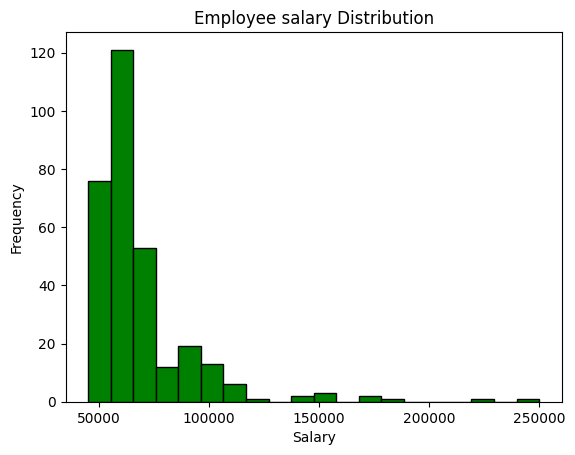

In [11]:
#7.Find the distribution of employee salaries.
plt.hist(hrdata['Salary'],bins=20,edgecolor='black',color='green')
plt.title('Employee salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [12]:
#8.What is the average age of employees at the company? (Use DOB column).
# Remove age outlier before running this using Z_score
from datetime import datetime
hrdata['DOB']=pd.to_datetime(hrdata['DOB'])
hrdata['Age']=(pd.to_datetime('today') - hrdata['DOB']).dt.days // 365
hrdata['Age'].mean()

/tmp/ipykernel_36/3282110243.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hrdata['DOB']=pd.to_datetime(hrdata['DOB'])


16.85209003215434

In [13]:
#9.How many employees are still employed vs terminated?
employ_count=hrdata['Termd'].value_counts()
print(employ_count)

Termd
0    207
1    104
Name: count, dtype: int64


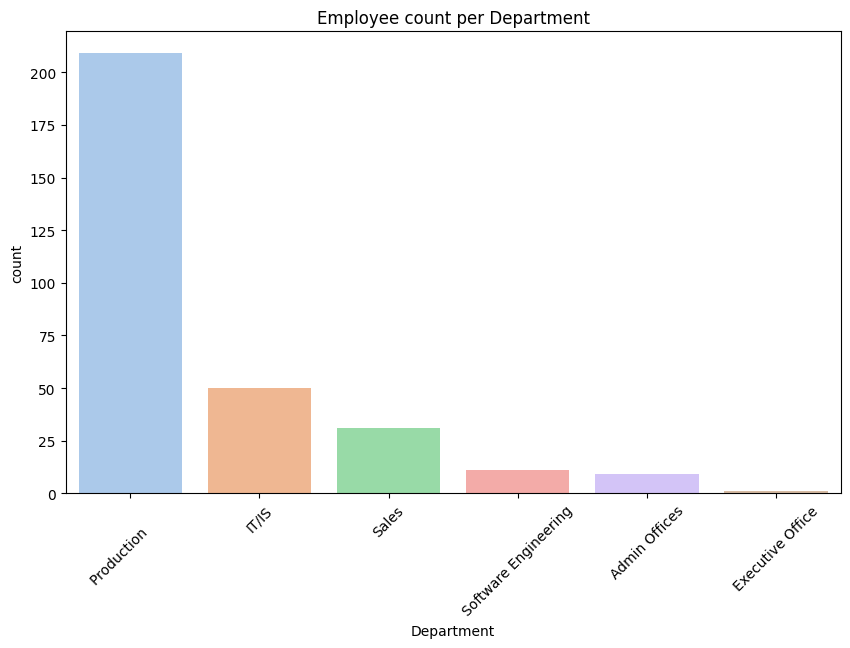

In [14]:
#10.Which departments have the most employees?
plt.figure(figsize=(10,6))
sns.countplot(data=hrdata,x='Department',order=hrdata['Department'].value_counts().index,palette='pastel')
plt.title("Employee count per Department")
plt.xticks(rotation=45)
plt.tight_layout
plt.show()


In [15]:
#Part B: Business Analysis
#11.What is the average salary per department?
avg_sal_dept=hrdata.groupby('Department')['Salary'].mean()
print(avg_sal_dept)

Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64


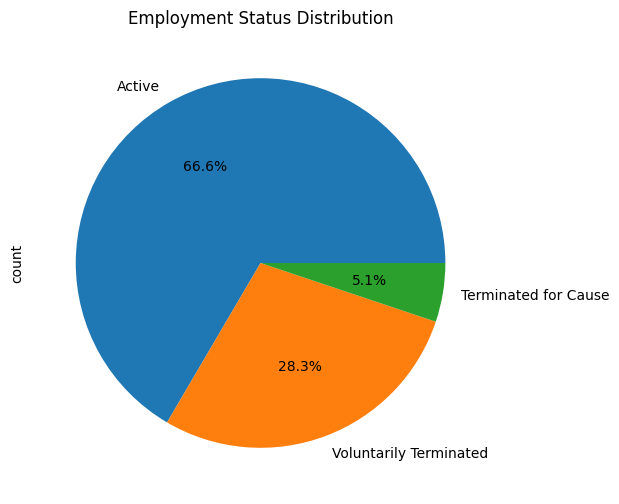

In [16]:
#12.Find the distribution of employment status (Active, Voluntarily Terminated, etc.).
hrdata['EmploymentStatus'].value_counts().plot.pie(figsize=(6,6),
title = 'Employment Status Distribution',autopct='%1.1f%%')
plt.show()

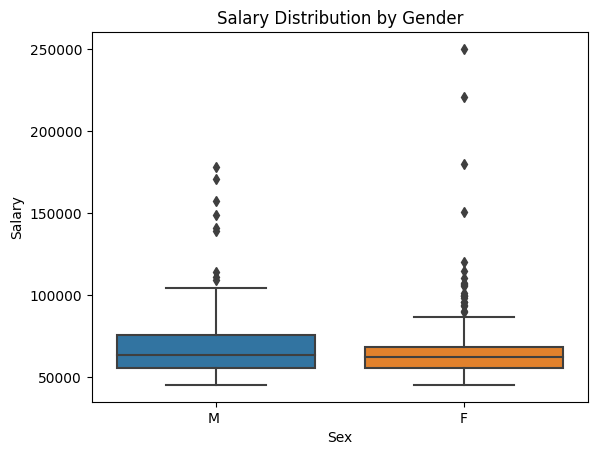

In [17]:
#13.Compare salary levels between Male and Female employees.
sns.boxplot(data=hrdata,x="Sex",y='Salary')
plt.title('Salary Distribution by Gender')
plt.show()

In [18]:
#14.Which recruitment source brings in the most employees?
most_employees=hrdata['RecruitmentSource'].value_counts()
print(most_employees)

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [19]:
#15.What percentage of employees attended a Diversity Job Fair?
diversity_pct=hrdata['FromDiversityJobFairID'].mean() * 100
print(diversity_pct)

9.32475884244373


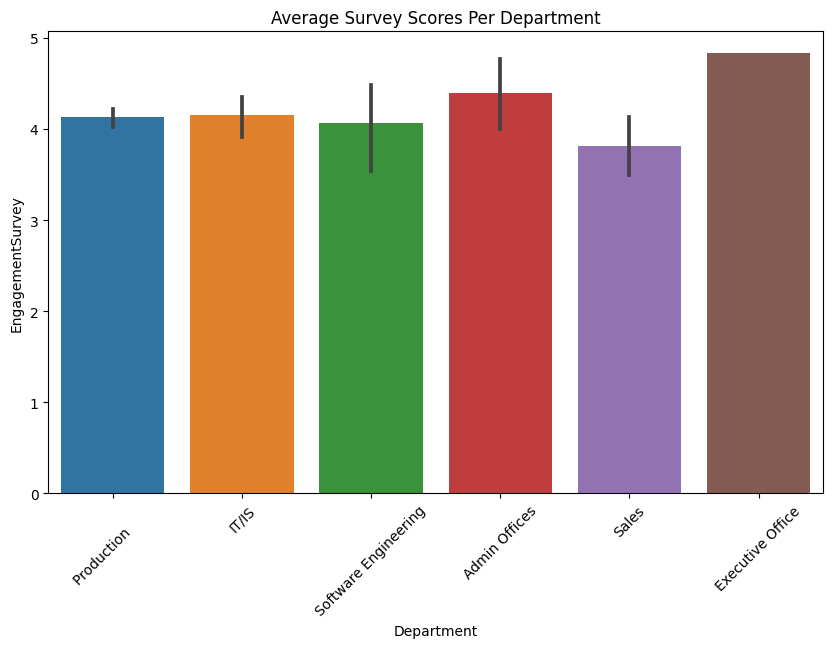

In [20]:
#16.Compare engagement survey scores across different departments.
palette = sns.color_palette("husl", len('departments'))
plt.figure(figsize=(10,6))
sns.barplot(data=hrdata,x='Department',y='EngagementSurvey',estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Survey Scores Per Department')
plt.tight_layout
plt.show()

In [21]:
#17.Which race has the highest average salary?
race_sal=hrdata.groupby('RaceDesc')['Salary'].mean().idxmax(0)
print(race_sal)

Hispanic


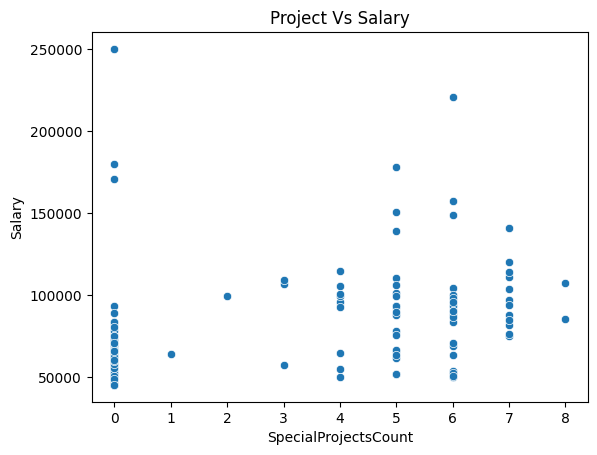

In [22]:
#18.What is the relationship between number of projects (SpecialProjectsCount) and salary?
sns.scatterplot(data=hrdata,x='SpecialProjectsCount',y='Salary')
plt.title('Project Vs Salary')
plt.show()

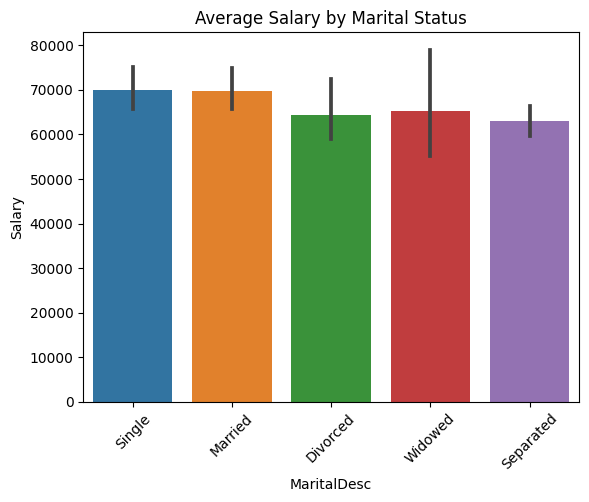

In [23]:
#19.Do married employees earn more on average than single employees?
sns.barplot(data=hrdata,x='MaritalDesc',y='Salary',estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Salary by Marital Status')
plt.show()

In [24]:
#20.Which managers have the largest teams?
manager_teamsize=hrdata.groupby('ManagerName').size().sort_values(ascending=False)
print(manager_teamsize)

ManagerName
Michael Albert        22
Kissy Sullivan        22
Brannon Miller        22
Kelley Spirea         22
Elijiah Gray          22
Webster Butler        21
Amy Dunn              21
Ketsia Liebig         21
David Stanley         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
dtype: int64


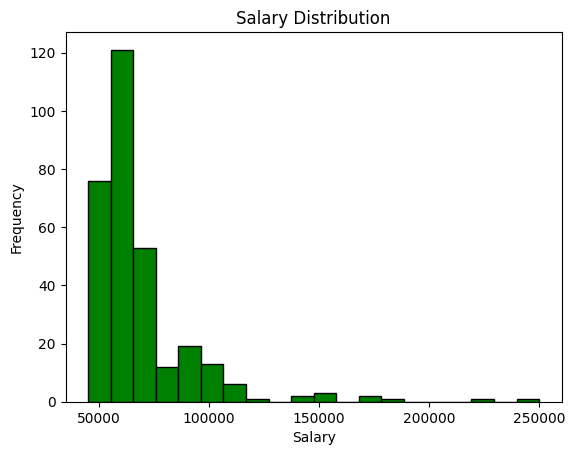

In [25]:
#Part C: Data Visualization
#21.Plot the salary distribution using histograms.
# Matplotlib Hist
plt.hist(hrdata['Salary'],bins=20,edgecolor='black',color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

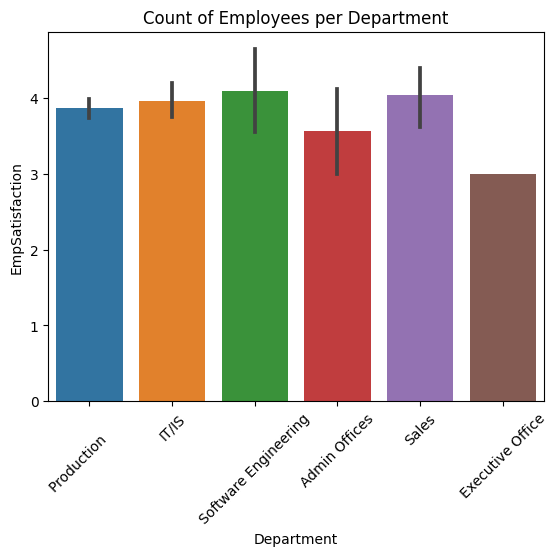

In [26]:
#22.Show the count of employees by department.
# Seaborn Countplot
sns.barplot(data=hrdata,x='Department',y='EmpSatisfaction',estimator='mean')
plt.title('Count of Employees per Department')
plt.tight_layout
plt.xticks(rotation=45)
plt.show()

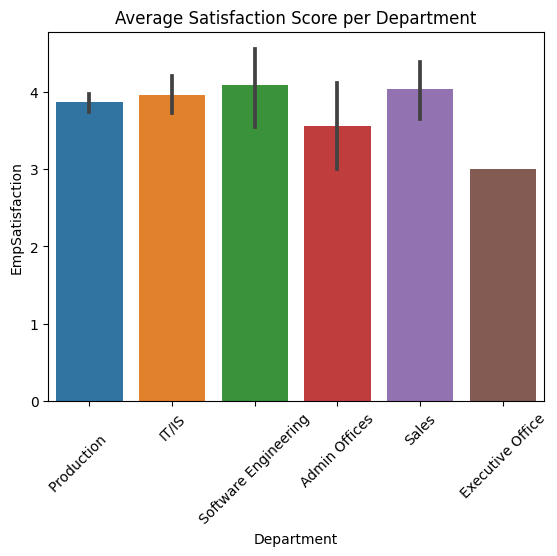

In [27]:
#23.Compare average satisfaction score by department.
# Seaborn Barplot
sns.barplot(data=hrdata,x='Department',y='EmpSatisfaction',estimator='mean')
plt.xticks(rotation=45)
plt.title('Average Satisfaction Score per Department')
plt.tight_layout
plt.show()

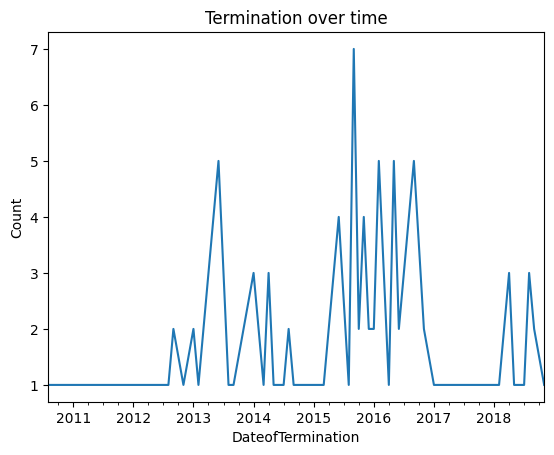

In [28]:
#24.Visualize employee terminations over time.
# Pandas Datetime Plot
hrdata['DateofTermination']=pd.to_datetime(hrdata['DateofTermination'],errors='coerce')
hrdata['DateofTermination'].dropna().groupby(hrdata['DateofTermination'].
                                             dt.to_period('M')).count().plot()
plt.title('Termination over time')
plt.tight_layout
plt.ylabel('Count')
plt.show()

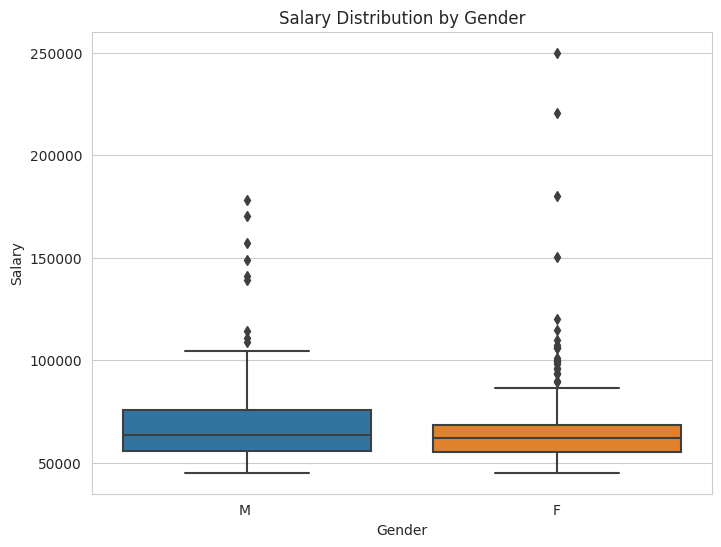

In [29]:
#25.Plot average salary by gender using a boxplot.
# Seaborn Boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(data=hrdata,x="Sex",y='Salary')
plt.title('Salary Distribution by Gender')
plt.ylabel('Salary')
plt.xlabel('Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


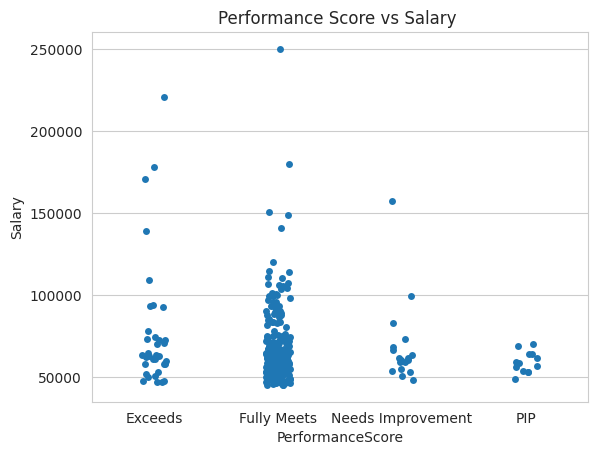

In [30]:
#26.Visualize performance scores vs salary.
# Seaborn Stripplot
sns.stripplot(data=hrdata,x='PerformanceScore',y='Salary',jitter=True)
plt.title('Performance Score vs Salary ')
plt.show()

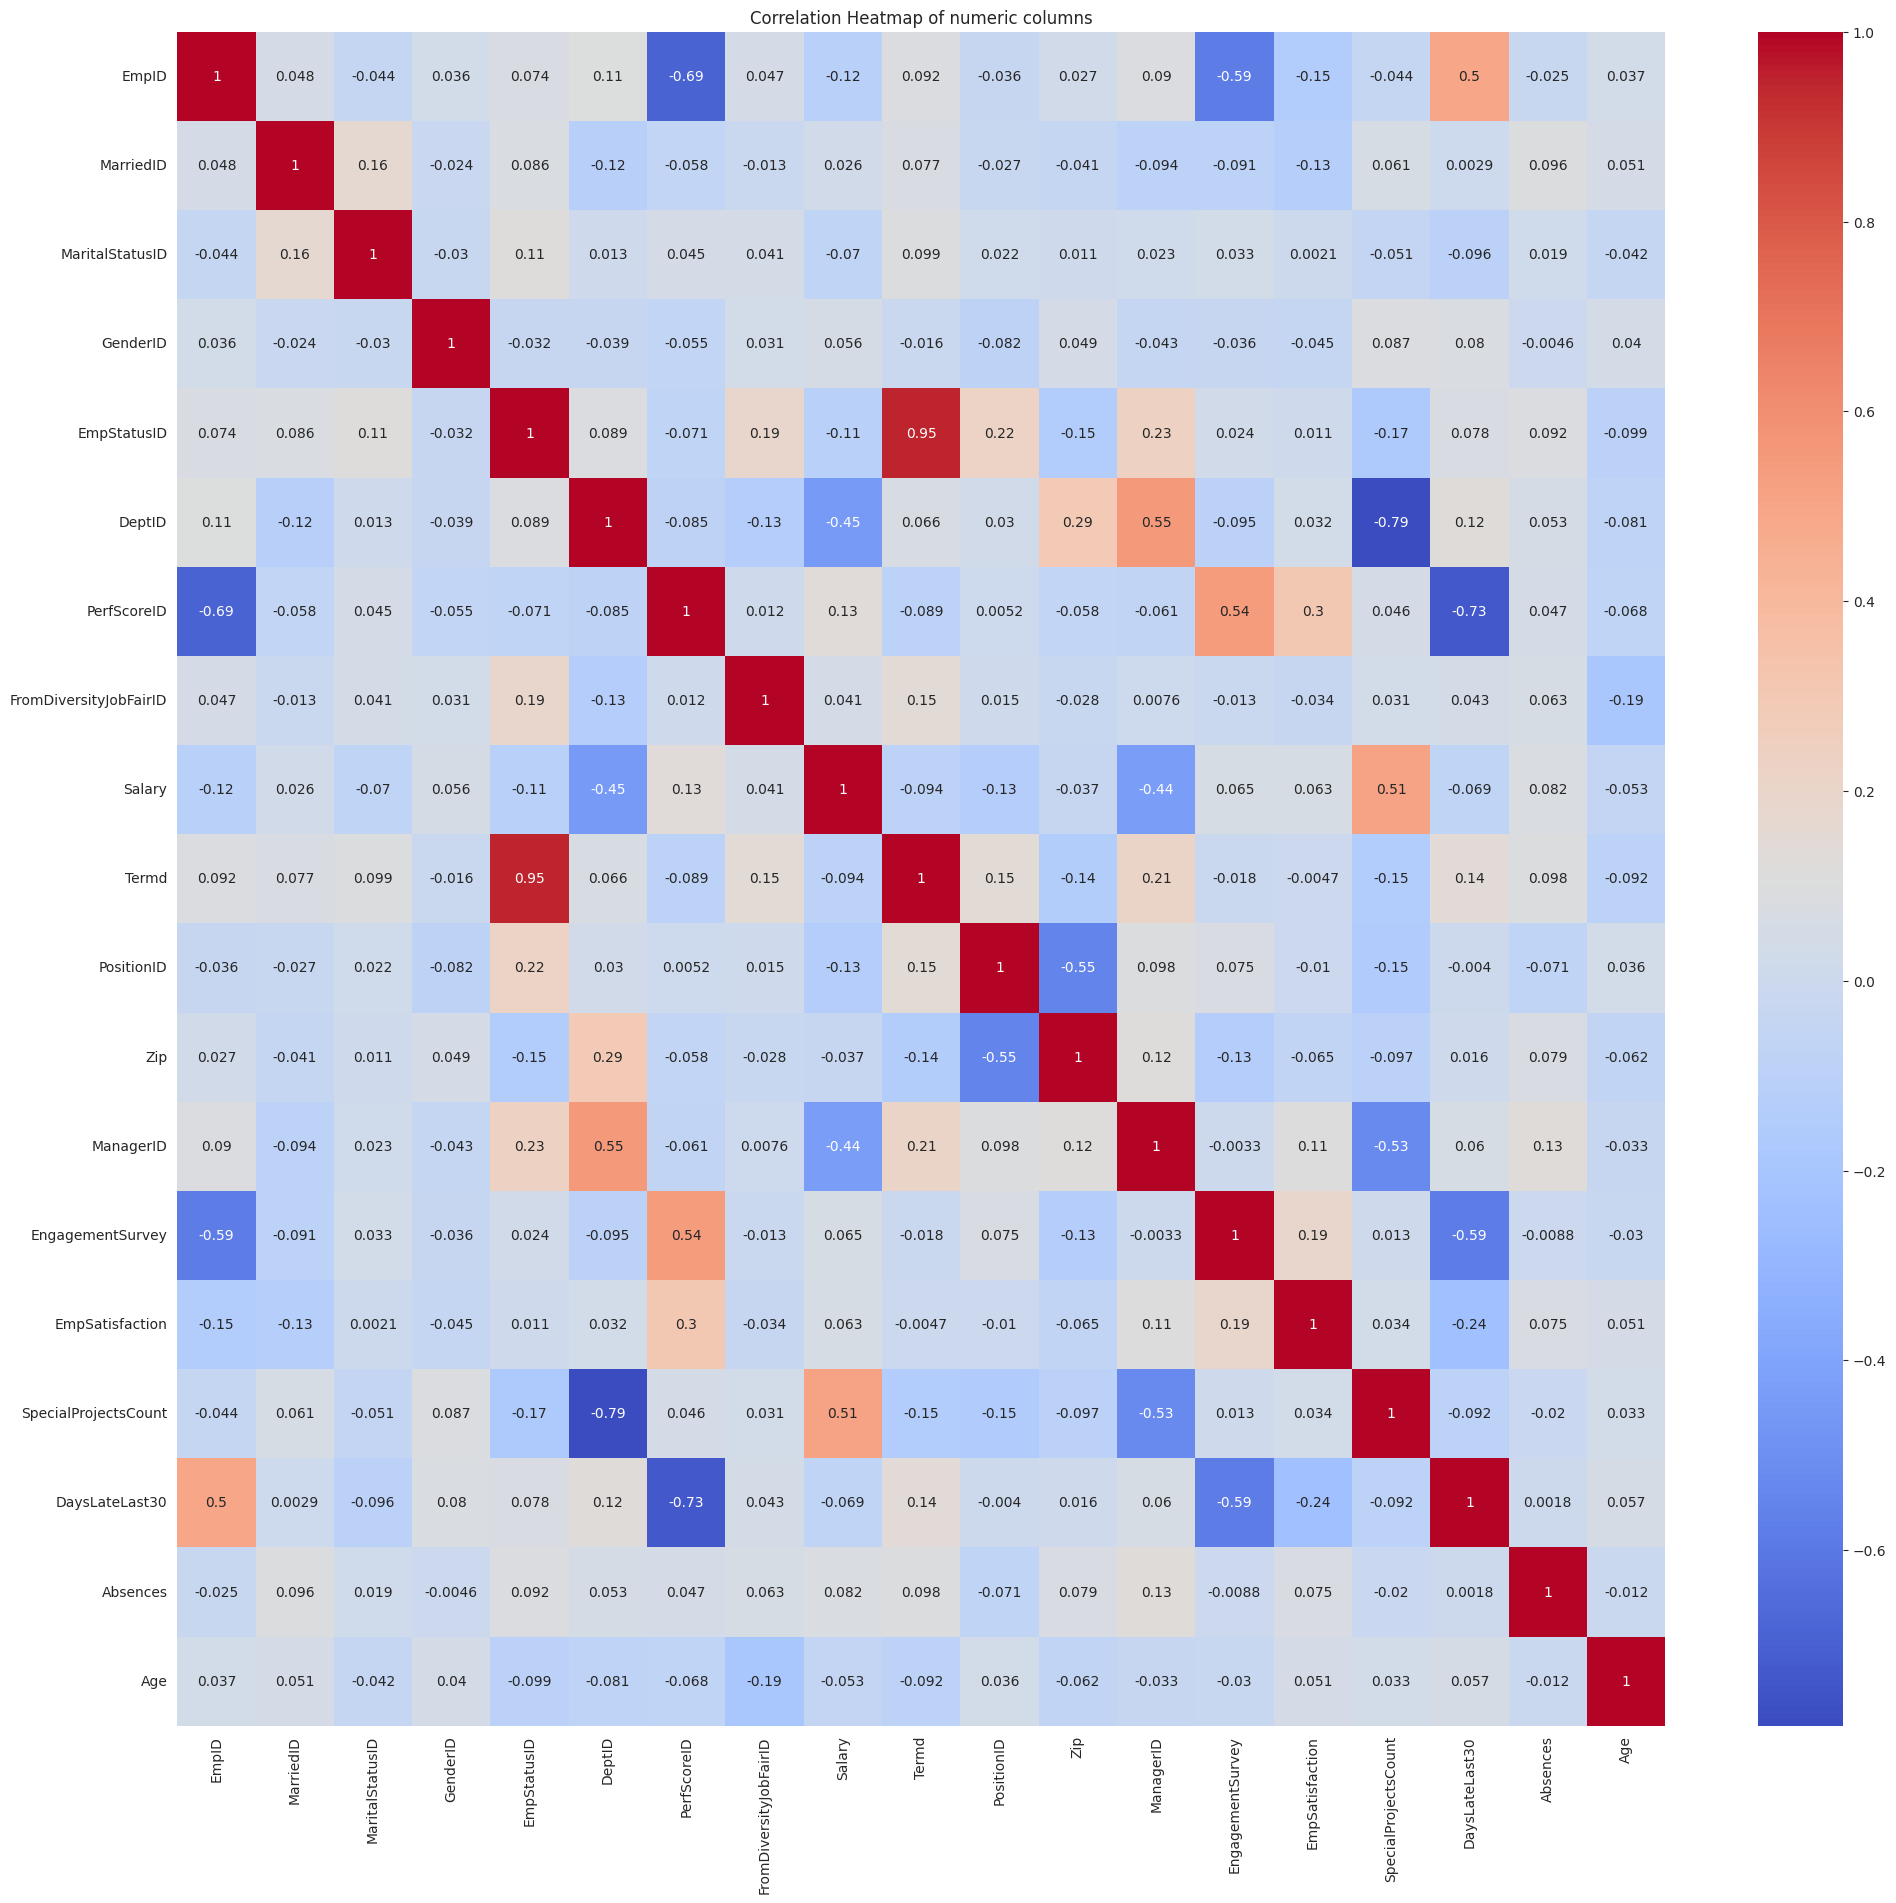

In [31]:
#27.Create a heatmap of correlations between numeric variables.
# Seaborn Heatmap
numeric_columns=hrdata.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(24,22))
sns.heatmap(numeric_columns,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap of numeric columns')
plt.show()

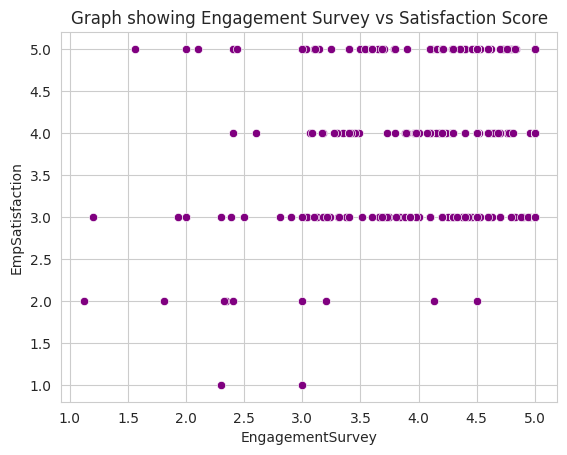

In [32]:
#28.Plot engagement survey score vs satisfaction score.
# Seaborn Scatterplot
sns.scatterplot(data=hrdata,x='EngagementSurvey',y='EmpSatisfaction',color='purple')
plt.title('Graph showing Engagement Survey vs Satisfaction Score')
plt.show()

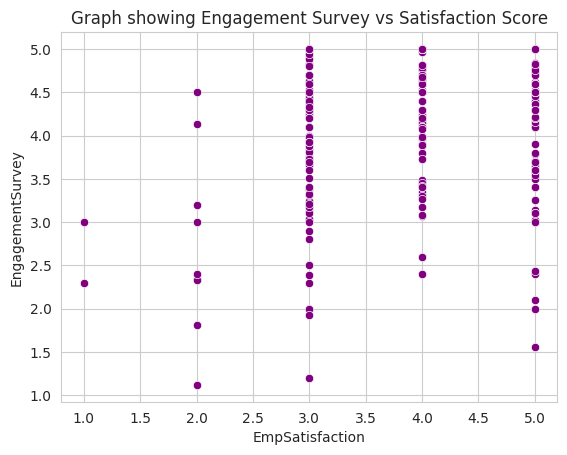

In [33]:
sns.scatterplot(data=hrdata,x='EmpSatisfaction',y='EngagementSurvey',color='purple')
plt.title('Graph showing Engagement Survey vs Satisfaction Score')
plt.show()

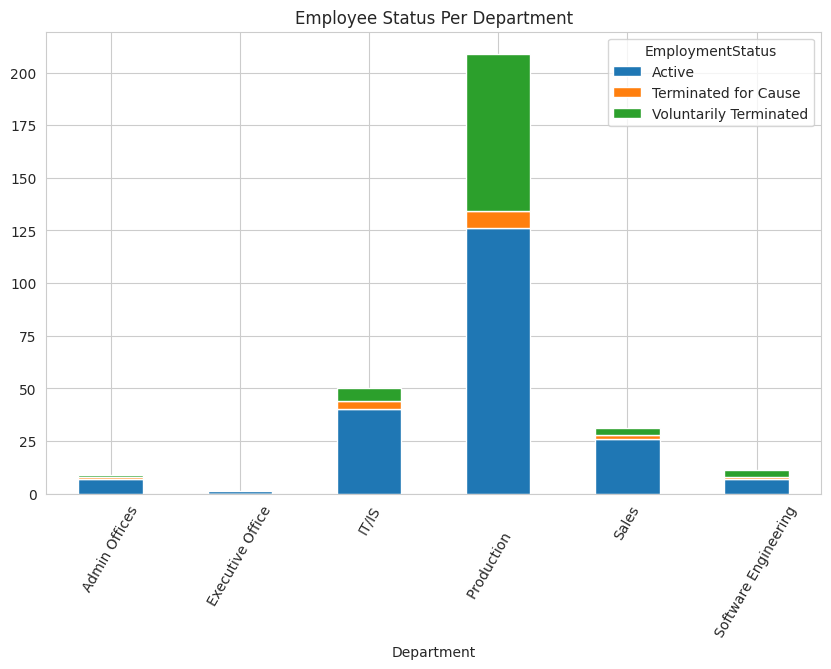

In [34]:
#29.Show a stacked bar chart of employee status across departments.
# Matplotlib Stacked Bar
emp_status=hrdata.groupby(['Department','EmploymentStatus']).size().unstack().fillna(0)
emp_status.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Employee Status Per Department')
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


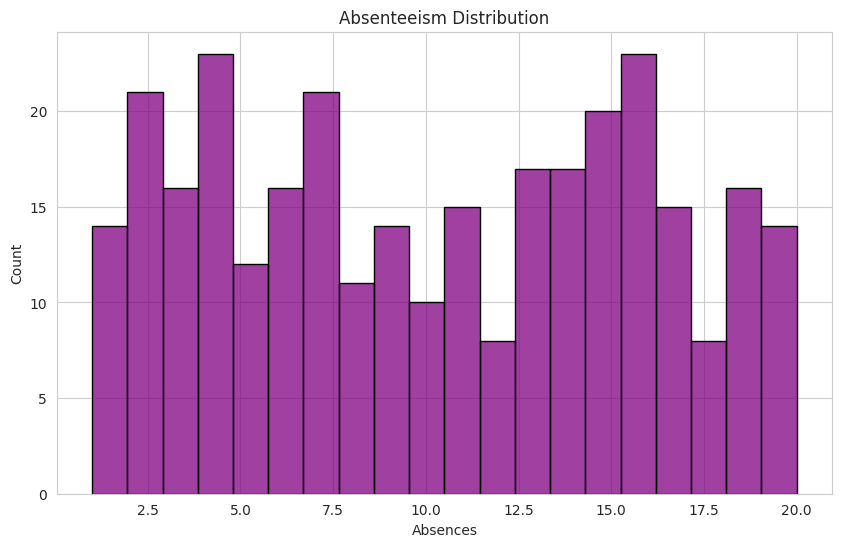

In [35]:
#30.Plot absenteeism (Absences) distribution among employees.
# Seaborn Histplot
plt.figure(figsize=(10,6))
sns.histplot(data=hrdata,x='Absences',bins=20,color='purple',edgecolor='black')
plt.title('Absenteeism Distribution')
plt.show()

In [40]:
#Part D: PCA (Dimensionality Reduction)
#31.Standardize numerical features before applying PCA.
#Scikit-learn StandardScaler
drop_columns = ['EmpID','ManagerID','DeptID','MarriedID','MaritalStatusID',
             'GenderID','EmpStatusID','PositionID','PerfScoreID','Zip']
numeric_columns = hrdata.select_dtypes(include=['int64', 'float64'])  # DataFrame of numeric cols
numeric_columns = numeric_columns.drop(columns=drop_columns, errors='ignore')

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(numeric_columns)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [41]:
#32.Perform PCA on the dataset and explain the first 2 components.
# Scikit-learn PCA
pca = PCA()
pca_data = pca.fit_transform(df_scaled)

explained_var = pca.explained_variance_ratio_
components = pca.components_

print("Explained Variance Ratio:", explained_var)
print("PCA Components (loadings):")
print(pd.DataFrame(components,
                   columns=numeric_columns.columns,
                   index=[f'PC{i+1}' for i in range(components.shape[0])]))

Explained Variance Ratio: [0.20234869 0.16290243 0.14683949 0.11888467 0.0950179  0.08977169
 0.08756182 0.0542522  0.0424211 ]
PCA Components (loadings):
     FromDiversityJobFairID    Salary     Termd  EngagementSurvey  \
PC1                0.056454 -0.349438  0.216011         -0.523405   
PC2                0.088951  0.576109 -0.166589         -0.370562   
PC3                0.600795  0.134190  0.470047          0.095491   
PC4               -0.169729  0.071188  0.236381         -0.113370   
PC5                0.223762  0.027128  0.485799         -0.014938   
PC6                0.143654 -0.100221 -0.490766         -0.339279   
PC7                0.724523 -0.181483 -0.381861          0.065022   
PC8                0.048224  0.643879 -0.109272          0.250997   
PC9               -0.034259 -0.254203 -0.118983          0.619838   

     EmpSatisfaction  SpecialProjectsCount  DaysLateLast30  Absences       Age  
PC1        -0.329510             -0.338805        0.574659 -0.019920  0.0

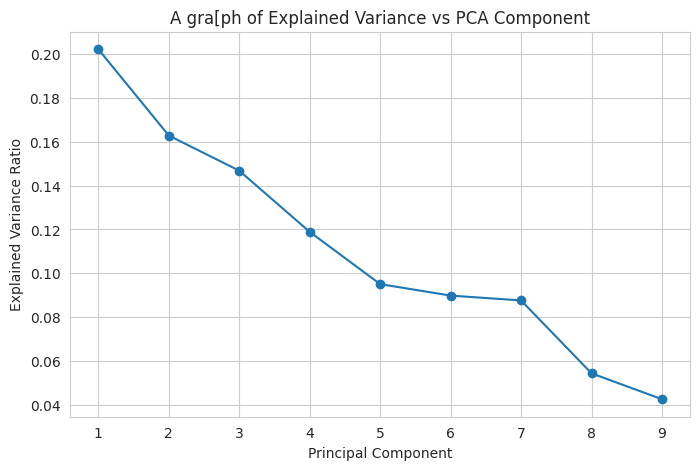

In [42]:
#33.Plot the explained variance ratio for the PCA components.
# Matplotlib Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker="o")
plt.title("A gra[ph of Explained Variance vs PCA Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

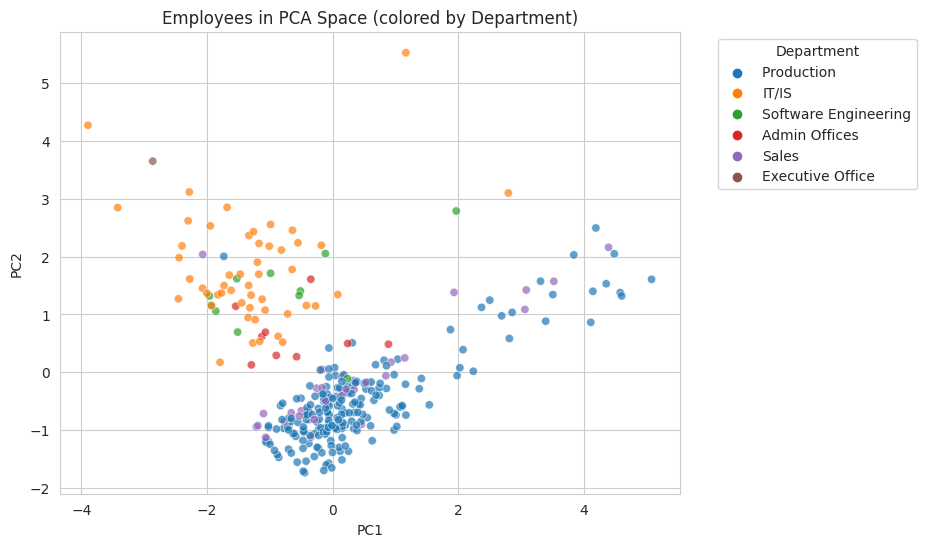

In [43]:
#34.Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.
# Seaborn Scatterplot
pca_2d = PCA(n_components=2)
pca_data = pca_2d.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Department'] = hrdata['Department']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Department', alpha=0.7)
plt.title("Employees in PCA Space (colored by Department)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Department')
plt.show()

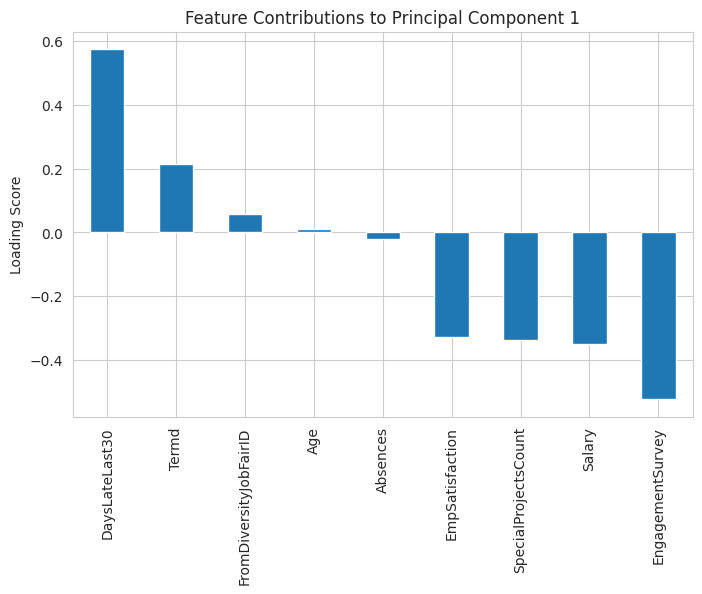

In [44]:
#35.Which variables contribute most to the first principal component?
# PCA Components
loadings = pd.DataFrame(
    pca.components_,          # each row = principal component
    columns=numeric_columns.columns,   # original feature names
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
pc1_loadings = loadings.loc["PC1"].sort_values(ascending=False)
plt.figure(figsize=(8,5))
pc1_loadings.plot(kind="bar")
plt.title("Feature Contributions to Principal Component 1")
plt.ylabel("Loading Score")
plt.show()

In [45]:
#36.Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?
# PCA in Practice – TowardsDataScience.
df_scaled_df = pd.DataFrame(df_scaled, columns=numeric_columns.columns)


wellbeing_features = df_scaled_df[['EngagementSurvey', 'EmpSatisfaction', 'Absences']]


pca_wellbeing = PCA()
pca_wellbeing.fit(wellbeing_features)

print("Explained Variance Ratio:", pca_wellbeing.explained_variance_ratio_)

Explained Variance Ratio: [0.39958328 0.33535499 0.26506173]


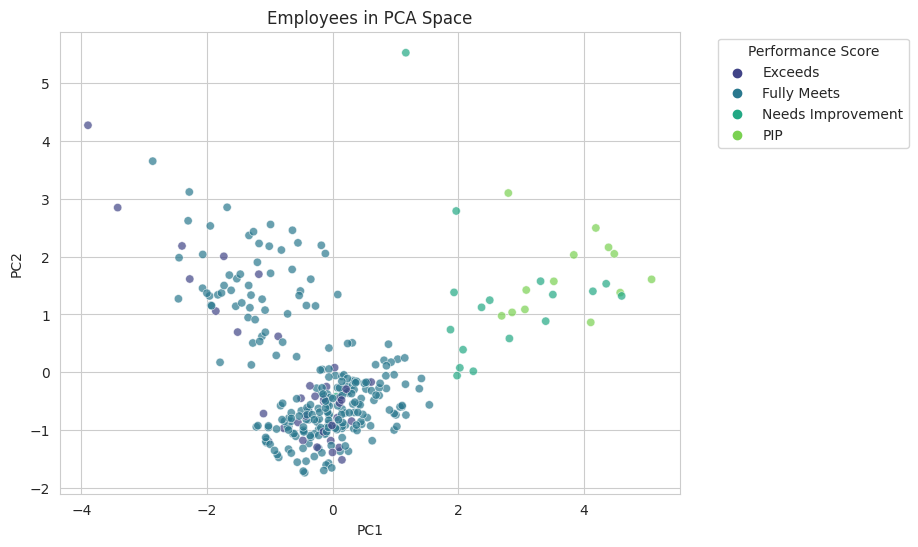

In [46]:
#37.Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
# Seaborn Hue in Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=pca_data[:,0], y=pca_data[:,1],
    hue=hrdata['PerformanceScore'],
    palette='viridis', alpha=0.7
)
plt.title("Employees in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Performance Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [48]:
#38.Compare clustering before and after PCA using k-means on numeric data.
# Scikit-learn KMeans

kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(df_scaled)
sil_raw = silhouette_score(df_scaled, labels_raw)


kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_data[:, :2])  
sil_pca = silhouette_score(pca_data[:, :2], labels_pca)

print("Silhouette Score (Raw):", sil_raw)
print("Silhouette Score (PCA 2D):", sil_pca)

Silhouette Score (Raw): 0.25335439275070337
Silhouette Score (PCA 2D): 0.6235157711325232


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


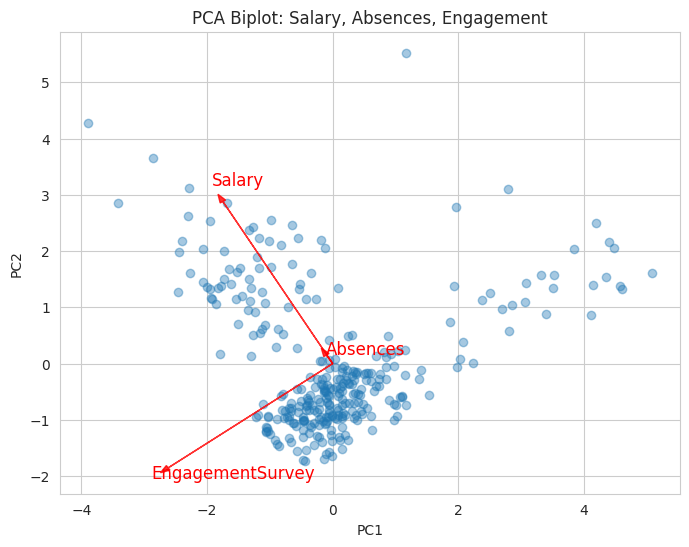

In [50]:
#39.Plot loadings of salary, absences, and engagement on the first 2 PCs.
# PCA Biplot Guide
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.4)


features = ['Salary', 'Absences', 'EngagementSurvey']
loadings = pca_2d.components_.T
selected_idx = [list(numeric_columns.columns).index(f) for f in features]


for i, idx in enumerate(selected_idx):
    plt.arrow(0, 0,
              loadings[idx,0]*5, loadings[idx,1]*5, 
              color='red', alpha=0.8, head_width=0.1)
    plt.text(loadings[idx,0]*5*1.1, loadings[idx,1]*5*1.1,
             features[i], color='red', fontsize=12)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot: Salary, Absences, Engagement")
plt.grid(True)
plt.show()

In [51]:
#40.Discuss when PCA is appropriate in HR analytics (e.g., reducing survey dimensions).
# Analytics Vidhya – PCA Use Cases
print("""PCA is especially useful in HR analytics when:
- Reducing dimensionality of survey data.
- Visualizing employee clusters based on performance or department.
- Identifying key drivers of variation in workforce metrics.
- Preparing data for clustering or predictive modeling.""")

PCA is especially useful in HR analytics when:
- Reducing dimensionality of survey data.
- Visualizing employee clusters based on performance or department.
- Identifying key drivers of variation in workforce metrics.
- Preparing data for clustering or predictive modeling.
